In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Projec-Getting and Cleaning Data

## Data Set Information:

The experiments were carried out with a group of 30 volunteers within an age bracket of 19-48 years. They performed a protocol of activities composed of six basic activities: three static postures (standing, sitting, lying) and three dynamic activities (walking, walking downstairs and walking upstairs). The experiment also included postural transitions that occurred between the static postures. These are: stand-to-sit, sit-to-stand, sit-to-lie, lie-to-sit, stand-to-lie, and lie-to-stand. All the participants were wearing a smartphone (Samsung Galaxy S II) on the waist during the experiment execution. We captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz using the embedded accelerometer and gyroscope of the device. The experiments were video-recorded to label the data manually. The obtained dataset was randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of 561 features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details. 

One of the most exciting areas in all of data science right now is wearable computing - see for example this article .   
Companies like Fitbit, Nike, and Jawbone Up are racing to develop the most advanced algorithms to attract new users. The data linked to from the course website represent data collected from the accelerometers from the Samsung Galaxy S smartphone. A full description is available at the site where the data was obtained:

<http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones>

Here are the data for the project:

<https://d396qusza40orc.cloudfront.net/getdata%2Fprojectfiles%2FUCI%20HAR%20Dataset.zip>

You should create one R script called run_analysis.R that does the following.

1. Merges the training and the test sets to create one data set.
2. Extracts only the measurements on the mean and standard deviation for each measurement.
3. Uses descriptive activity names to name the activities in the data set
4. Appropriately labels the data set with descriptive variable names.
5. From the data set in step 4, creates a second, independent tidy data set with the average of each variable for each activity   
and each subject.

### Features Info

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

These signals were used to estimate variables of the feature vector for each pattern:  
'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

tBodyAcc-XYZ
tGravityAcc-XYZ
tBodyAccJerk-XYZ
tBodyGyro-XYZ
tBodyGyroJerk-XYZ
tBodyAccMag
tGravityAccMag
tBodyAccJerkMag
tBodyGyroMag
tBodyGyroJerkMag
fBodyAcc-XYZ
fBodyAccJerk-XYZ
fBodyGyro-XYZ
fBodyAccMag
fBodyAccJerkMag
fBodyGyroMag
fBodyGyroJerkMag

The set of variables that were estimated from these signals are: 

mean(): Mean value
std(): Standard deviation
mad(): Median absolute deviation 
max(): Largest value in array
min(): Smallest value in array
sma(): Signal magnitude area
energy(): Energy measure. Sum of the squares divided by the number of values. 
iqr(): Interquartile range 
entropy(): Signal entropy
arCoeff(): Autorregresion coefficients with Burg order equal to 4
correlation(): correlation coefficient between two signals
maxInds(): index of the frequency component with largest magnitude
meanFreq(): Weighted average of the frequency components to obtain a mean frequency
skewness(): skewness of the frequency domain signal 
kurtosis(): kurtosis of the frequency domain signal 
bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
angle(): Angle between to vectors.

Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:

gravityMean
tBodyAccMean
tBodyAccJerkMean
tBodyGyroMean
tBodyGyroJerkMean

The complete list of variables of each feature vector is available in 'features.txt'


## Load the data

In [7]:
import pandas as pd

In [5]:
# download the zipfile and zip it
import urllib.request
import zipfile
url = 'https://d396qusza40orc.cloudfront.net/getdata%2Fprojectfiles%2FUCI%20HAR%20Dataset.zip'
urllib.request.urlretrieve(url,'uci.zip')

# zip the files
zf = zipfile.ZipFile('uci.zip')
for name in zf.namelist():
    print(name)

('uci.zip', <http.client.HTTPMessage at 0x261ec96f828>)

UCI HAR Dataset/activity_labels.txt
UCI HAR Dataset/features.txt
UCI HAR Dataset/features_info.txt
UCI HAR Dataset/README.txt
UCI HAR Dataset/test/
UCI HAR Dataset/test/Inertial Signals/
UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt
UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt
UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt
UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt
UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt
UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt
UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt
UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt
UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt
UCI HAR Dataset/test/subject_test.txt
UCI HAR Dataset/test/X_test.txt
UCI HAR Dataset/test/y_test.txt
UCI HAR Dataset/train/
UCI HAR Dataset/train/Inertial Signals/
UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt
UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt


In [36]:
# 因为已经解压到本地，所以就不用zf.open这个函数打开每个txt文件了

features = pd.read_table('UCI HAR Dataset/features.txt',sep='\s+', header=None)
trainX = pd.read_table('UCI HAR Dataset/train/X_train.txt',sep='\s+', header=None)
trainY = pd.read_table('UCI HAR Dataset/train/y_train.txt',sep='\s+', header=None)
testX = pd.read_table('UCI HAR Dataset/test/X_test.txt',sep='\s+', header=None)
testY = pd.read_table('UCI HAR Dataset/test/y_test.txt',sep='\s+', header=None)
activity = pd.read_table('UCI HAR Dataset/activity_labels.txt',sep='\s+', header=None)
testSubject = pd.read_table('UCI HAR Dataset/test/subject_test.txt',sep='\s+', header=None)
trainSubject = pd.read_table('UCI HAR Dataset/train/subject_train.txt',sep='\s+', header=None)

In [37]:
activity.shape
features.shape
trainX.shape
trainY.shape
testX.shape
testY.shape
trainSubject.shape
testSubject.shape

(6, 2)

(561, 2)

(7352, 561)

(7352, 1)

(2947, 561)

(2947, 1)

(7352, 1)

(2947, 1)

## Check the data

In [38]:
## The features selected for this database come from the accelerometer and 
# gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. 
# These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. 
# Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. 
# Similarly, the acceleration signal was then separated into body and gravity acceleration signals 
# (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz.

features.head()

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [44]:
trainSubject.iloc[:,0].unique()
testSubject.iloc[:,0].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

array([ 2,  4,  9, 10, 12, 13, 18, 20, 24], dtype=int64)

In [43]:
activity.iloc[:,1].unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING',
       'STANDING', 'LAYING'], dtype=object)

## Merge data and change the columns

In [46]:
traindf = pd.concat([trainX, trainSubject, trainY], ignore_index=True, axis=1)
traindf.shape
traindf.head()

(7352, 563)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


In [47]:
testdf = pd.concat([testX, testSubject, testY], ignore_index=True, axis=1)
testdf.shape
testdf.head()

(2947, 563)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5


In [49]:
df = pd.concat([traindf, testdf], ignore_index=True, axis=0)
df.shape
df.head()

(10299, 563)

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,561,562
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


In [57]:
addf = pd.DataFrame({0: [562, 563], 1: ['Subject','Activityid']})
namelabel = pd.concat([features, addf], ignore_index=True, axis=0)
namelabel.shape
namelabel.head()
namelabel.tail()
colname = namelabel.iloc[:,1]

(563, 2)

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


,0,1
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"
560,561,"angle(Z,gravityMean)"
561,562,Subject
562,563,Activityid


In [63]:
df.columns=colname
type(colname)
df.columns

pandas.core.series.Series

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Subject',
       'Activityid'],
      dtype='object', name=1, length=563)

## Extracts only the measurements on the mean and standard deviation for each measurement.

In [115]:
selectdf = df[[col for col in df.columns if re.findall(r'Subject|Activityid|mean|std',col)]]
selectdf.shape
selectdf.head()

(10299, 81)

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,...,fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-meanFreq(),Subject,Activityid
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,0.963396,-0.140840,0.115375,-0.985250,...,-0.993755,0.346989,-0.980135,-0.961309,-0.128989,-0.991990,-0.990697,-0.074323,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,0.966561,-0.141551,0.109379,-0.997411,...,-0.991960,0.532061,-0.988296,-0.983322,-0.271958,-0.995854,-0.996399,0.158075,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,0.966878,-0.142010,0.101884,-0.999574,...,-0.990867,0.660795,-0.989255,-0.986028,-0.212728,-0.995031,-0.995127,0.414503,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,0.967615,-0.143976,0.099850,-0.996646,...,-0.991700,0.678921,-0.989413,-0.987836,-0.035684,-0.995221,-0.995237,0.404573,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,0.968224,-0.148750,0.094486,-0.998429,...,-0.994389,0.559058,-0.991433,-0.989059,-0.273582,-0.995093,-0.995465,0.087753,1,5


In [134]:
activity.columns=['Activityid','Activity']
activity.head()

,Activityid,Activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING


In [143]:
mergedf= selectdf.merge(activity)
mergedf.shape
mergedf.head()

(10299, 82)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,...,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-meanFreq(),Subject,Activityid,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,0.963396,-0.140840,0.115375,-0.985250,...,0.346989,-0.980135,-0.961309,-0.128989,-0.991990,-0.990697,-0.074323,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,0.966561,-0.141551,0.109379,-0.997411,...,0.532061,-0.988296,-0.983322,-0.271958,-0.995854,-0.996399,0.158075,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,0.966878,-0.142010,0.101884,-0.999574,...,0.660795,-0.989255,-0.986028,-0.212728,-0.995031,-0.995127,0.414503,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,0.967615,-0.143976,0.099850,-0.996646,...,0.678921,-0.989413,-0.987836,-0.035684,-0.995221,-0.995237,0.404573,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,0.968224,-0.148750,0.094486,-0.998429,...,0.559058,-0.991433,-0.989059,-0.273582,-0.995093,-0.995465,0.087753,1,5,STANDING


## Clean the column names

In [144]:
mergedf.columns = [re.sub(r'\(\)', '', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'^t', 'time', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'^f', 'frenquence', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'-mean', 'Mean', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'-std', 'Std', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'Acc', 'Acceleration', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'Gyro', 'AngularVelocity', col) for col in mergedf.columns]
mergedf.columns = [re.sub(r'Mag', 'Manitude', col) for col in mergedf.columns]
mergedf.columns

Index(['timeBodyAccelerationMean-X', 'timeBodyAccelerationMean-Y',
       'timeBodyAccelerationMean-Z', 'timeBodyAccelerationStd-X',
       'timeBodyAccelerationStd-Y', 'timeBodyAccelerationStd-Z',
       'timeGravityAccelerationMean-X', 'timeGravityAccelerationMean-Y',
       'timeGravityAccelerationMean-Z', 'timeGravityAccelerationStd-X',
       'timeGravityAccelerationStd-Y', 'timeGravityAccelerationStd-Z',
       'timeBodyAccelerationJerkMean-X', 'timeBodyAccelerationJerkMean-Y',
       'timeBodyAccelerationJerkMean-Z', 'timeBodyAccelerationJerkStd-X',
       'timeBodyAccelerationJerkStd-Y', 'timeBodyAccelerationJerkStd-Z',
       'timeBodyAngularVelocityMean-X', 'timeBodyAngularVelocityMean-Y',
       'timeBodyAngularVelocityMean-Z', 'timeBodyAngularVelocityStd-X',
       'timeBodyAngularVelocityStd-Y', 'timeBodyAngularVelocityStd-Z',
       'timeBodyAngularVelocityJerkMean-X',
       'timeBodyAngularVelocityJerkMean-Y',
       'timeBodyAngularVelocityJerkMean-Z', 'timeBodyAngular

In [145]:
len(mergedf.columns)

82

## creates a second, independent tidy data set with the average of each variable for each activity and each subject.

In [147]:
mergedf.isnull().sum().sum()

0

In [149]:
tidydf = mergedf.groupby(['Subject','Activity']).sum()
tidydf.shape
tidydf.head()

(180, 80)

timeBodyAccelerationMean-X  \
Subject Activity                                         
1       LAYING                               11.079912   
        SITTING                              12.278166   
        STANDING                             14.782634   
        WALKING                              26.346422   
        WALKING_DOWNSTAIRS                   14.170228   

                            timeBodyAccelerationMean-Y  \
Subject Activity                                         
1       LAYING                               -2.025698   
        SITTING                              -0.061490   
        STANDING                             -0.855292   
        WALKING                              -1.651463   
        WALKING_DOWNSTAIRS                   -0.486007   

                            timeBodyAccelerationMean-Z  \
Subject Activity                                         
1       LAYING                               -5.660178   
        SITTING                              -4.913577   
        STANDING                             -5.861896   
        WALKING                             -10.559070   
        WALKING_DOWNSTAIRS                   -5.270743   

                            timeBodyAccelerationStd-X  \
Subject Activity                                        
1       LAYING                             -46.402823   
        SITTING                            -45.929763   
        STANDING                           -52.775275   
        WALKING                            -26.955325   
        WALKING_DOWNSTAIRS                   1.471732   

                            timeBodyAccelerationStd-Y  \
Subject Activity                                        
1       LAYING                             -41.841370   
        SITTING                            -43.363076   
        STANDING                           -51.579073   
        WALKING                             10.873827   
        WALKING_DOWNSTAIRS                  -1.564861   

                            timeBodyAccelerationStd-Z  \
Subject Activity                                        
1       LAYING                             -41.303070   
        SITTING                            -44.160556   
        STANDING                           -51.928121   
        WALKING                            -24.702651   
        WALKING_DOWNSTAIRS                 -11.291276   

                            timeGravityAccelerationMean-X  \
Subject Activity                                            
1       LAYING                                 -12.444090   
        SITTING                                 39.080967   
        STANDING                                49.976456   
        WALKING                                 88.846204   
        WALKING_DOWNSTAIRS                      45.661847   

                            timeGravityAccelerationMean-Y  \
Subject Activity                                            
1       LAYING                                  35.277489   
        SITTING                                  9.607345   
        STANDING                               -14.468143   
        WALKING                                -26.805677   
        WALKING_DOWNSTAIRS                     -13.063907   

                            timeGravityAccelerationMean-Z  \
Subject Activity                                            
1       LAYING                                  22.290886   
        SITTING                                 15.606054   
        STANDING                                 0.715001   
        WALKING                                 -6.469772   
        WALKING_DOWNSTAIRS                      -3.043878   

                            timeGravityAccelerationStd-X     ...      \
Subject Activity                                             ...       
1       LAYING                                -44.841501     ...       
        SITTING                               -45.517486     ...       
        STANDING                   

In [153]:
tidydf.to_csv('tidydf.csv')

([], <a list of 0 Text xticklabel objects>)

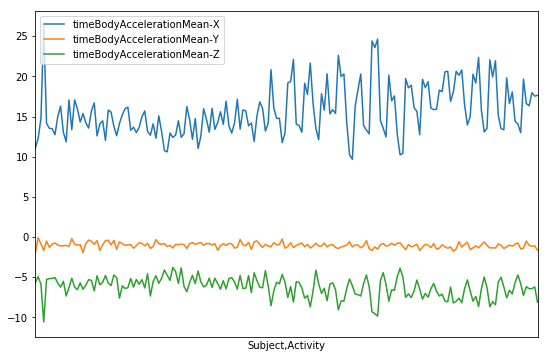

In [172]:
import matplotlib.pyplot as plt
tidydf.iloc[:,:3].plot(figsize=(9,6))
plt.xticks([])
plt.show()

In [170]:
tidydf.index

MultiIndex(levels=[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2

# Notes

## ctrl+/可实现多行同时注释